# 1_Import

In [46]:
import json 
import time
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
with open(r"C:\Users\manon\Dev\2023_boissons\beverage_dispenser.json") as f:
    data = json.load(f)

In [49]:
# impression uniquement des 10 premieres lignes 
for x in data["content"][:10] : 
    print (x)

{'date': '2019-11-14T11:53:35.000Z', 'product': 'refill', 'machine': 'A'}
{'date': '2019-11-14T12:06:35.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:07:59.000Z', 'product': 'soda', 'machine': 'A'}
{'date': '2019-11-14T12:13:45.000Z', 'product': 'soda', 'machine': 'A'}
{'date': '2019-11-14T12:22:35.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:37:44.000Z', 'product': 'soda', 'machine': 'A'}
{'date': '2019-11-14T12:47:09.000Z', 'product': 'refill', 'machine': 'B'}
{'date': '2019-11-14T12:47:52.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:51:00.000Z', 'product': 'coffee', 'machine': 'A'}
{'date': '2019-11-14T12:52:49.000Z', 'product': 'coffee', 'machine': 'A'}


# 2_ Conversion du JSON en DataFrame

In [50]:
df_stock = pd.json_normalize(data["content"])

In [51]:
# Le journal contient les ventes de produits et les "refill" par l'employé. Chaque ligne correspond à 
# une action (une vente d'une boisson ou un refill par l'employé). Il y a bien 4 machines.

In [52]:
df_stock

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
1,2019-11-14T12:06:35.000Z,coffee,A
2,2019-11-14T12:07:59.000Z,soda,A
3,2019-11-14T12:13:45.000Z,soda,A
4,2019-11-14T12:22:35.000Z,coffee,A
...,...,...,...
11037,2019-12-25T20:10:53.000Z,nrj,A
11038,2019-12-25T20:16:30.000Z,nrj,B
11039,2019-12-25T20:26:35.000Z,nrj,B
11040,2019-12-25T21:11:55.000Z,nrj,B


 # 3_ Observation du nombre de refill qu'il y a eu au total

In [53]:
# l'employé remplie bien les 4 machines sur chacun de ses déplacements
# il y a 6 refills sur la période
df_stock[df_stock["product"]=="refill"].sort_values(by="date")

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
6,2019-11-14T12:47:09.000Z,refill,B
24,2019-11-14T13:51:23.000Z,refill,C
43,2019-11-14T14:54:30.000Z,refill,D
1840,2019-11-21T11:55:39.000Z,refill,A
1851,2019-11-21T13:33:01.000Z,refill,B
1862,2019-11-21T14:01:57.000Z,refill,C
1883,2019-11-21T15:00:58.000Z,refill,D
3678,2019-11-28T11:54:41.000Z,refill,A
3686,2019-11-28T12:54:01.000Z,refill,B


# 4_ Créations df_stock, df_stock items et frais

In [54]:
items_machines = {"item" : ["coffee", "soda", "nrj"], 
                  "prix_de_vente" : [1, 1.6, 1.8],
                  "cout_achat" : [0.3, 0.6, 0.8], 
                  "capacite" : [280, 120, 60]}

In [55]:
df_items = pd.DataFrame(data=items_machines)
df_items 

,item,prix_de_vente,cout_achat,capacite
0,coffee,1.0,0.3,280
1,soda,1.6,0.6,120
2,nrj,1.8,0.8,60


In [56]:
fees = {"type_de_frais" : ["fixe", "a_ajouter_par_machine"],
         "nb_machines" : [4, 4],
         "deplacement_par_machine" : [50, 20],
         "emplacement_mensuel" : [0, 150],
         "entretien_mensuel" : [0, 120]}

## Suivi du stock dans le temps

In [57]:
noms_des_machines = list(df_stock["machine"].unique())

In [58]:
noms_des_machines

['A', 'B', 'C', 'D']

In [59]:
items_machines["item"]

['coffee', 'soda', 'nrj']

In [60]:
start = time.time()
for id_machine in noms_des_machines : # pour chaque machine
    for prod in items_machines["item"] : # pour chaque produit dans le dico des produits
        df_stock[str(prod) + "_" + str(id_machine)] = 0 # création d'une colonne au nom de chaque produit et affectation de la valeur 0 par defaut
        df_stock[str(prod) + "_" + str(id_machine) + "_sum"] = 0
print(time.time() - start)

0.004010915756225586


In [61]:
def remplissage(machine) : 
    df_stock.iloc[i, 3:] = df_stock.iloc[i-1, 3:]
    for prod in items_machines["item"] :
        df_stock[str(prod) + "_" + str(machine)] = items_machines["capacite"][items_machines["item"].index(prod)]
    

In [62]:
df_stock

,date,product,machine,coffee_A,coffee_A_sum,soda_A,soda_A_sum,nrj_A,nrj_A_sum,coffee_B,coffee_B_sum,soda_B,soda_B_sum,nrj_B,nrj_B_sum,coffee_C,coffee_C_sum,soda_C,soda_C_sum,nrj_C,nrj_C_sum,coffee_D,coffee_D_sum,soda_D,soda_D_sum,nrj_D,nrj_D_sum
0,2019-11-14T11:53:35.000Z,refill,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-11-14T12:06:35.000Z,coffee,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-11-14T12:07:59.000Z,soda,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-11-14T12:13:45.000Z,soda,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-11-14T12:22:35.000Z,coffee,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,2019-12-25T20:10:53.000Z,nrj,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11038,2019-12-25T20:16:30.000Z,nrj,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11039,2019-12-25T20:26:35.000Z,nrj,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11040,2019-12-25T21:11:55.000Z,nrj,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
noms_des_machines

['A', 'B', 'C', 'D']

In [64]:
# Pour refill je remplis les stocks d'items, pour le reste je soustrais 1 à chaque item acheté et
# je copie la ligne précédente à partir de la derniere colonne qui ne contient pas mes stocks
# je ne copie pas la ligne précédente entièrement car je ne veux pas copier la date, ou le type de produits car sinon 
# je perds toutes les infos fixes du df_stock
for id_machine in noms_des_machines : # pour chaque machine
    for prod in items_machines["item"] : # pour chaque produit dans le dico des produits
        df_stock[str(prod) + "_" + str(id_machine)] = 0 # création d'une colonne au nom de chaque produit et affectation de la valeur 0 par defaut

for i in range(len(df_stock)) : 

    if df_stock["product"].iat[i] == "refill" or i==0 :
        machine_concernee = df_stock["machine"].iat[i]
        df_stock.iloc[i, 3:] = df_stock.iloc[i-1, 3:]
        df_stock[str(prod) + "_" + str(id_machine) + "_sum"] = 0
        for prod in items_machines["item"] :
            df_stock[str(prod) + "_" + str(machine_concernee)].iat[i] = items_machines["capacite"][items_machines["item"].index(prod)]
            df_stock[str(prod) + "_" + str(machine_concernee) + "_sum"] = 0
            
    else :
        machine_concernee = df_stock["machine"].iat[i]
        produit_concerne = df_stock["product"].iat[i]
        df_stock.iloc[i, 3:] = df_stock.iloc[i-1, 3:]
        df_stock[str(produit_concerne) + "_" + str(machine_concernee)].iat[i] -=1
        df_stock[str(produit_concerne) + "_" + str(machine_concernee) + "_sum"].iat[i] +=1

In [65]:
df_stock.iloc[5534:, :].head(6)

,date,product,machine,coffee_A,coffee_A_sum,soda_A,soda_A_sum,nrj_A,nrj_A_sum,coffee_B,coffee_B_sum,soda_B,soda_B_sum,nrj_B,nrj_B_sum,coffee_C,coffee_C_sum,soda_C,soda_C_sum,nrj_C,nrj_C_sum,coffee_D,coffee_D_sum,soda_D,soda_D_sum,nrj_D,nrj_D_sum
5534,2019-12-05T13:47:12.000Z,nrj,A,275,0,118,0,59,0,273,0,117,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0
5535,2019-12-05T13:47:53.000Z,soda,A,275,0,117,0,59,0,273,0,117,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0
5536,2019-12-05T13:57:12.000Z,coffee,B,275,0,117,0,59,0,272,0,117,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0
5537,2019-12-05T14:01:29.000Z,refill,C,275,0,117,0,59,0,272,0,117,0,60,0,280,0,120,0,60,0,0,0,0,0,0,0
5538,2019-12-05T14:03:06.000Z,soda,C,275,0,117,0,59,0,272,0,117,0,60,0,280,0,119,0,60,0,0,0,0,0,0,0
5539,2019-12-05T14:04:02.000Z,coffee,B,275,0,117,0,59,0,271,0,117,0,60,0,280,0,119,0,60,0,0,0,0,0,0,0


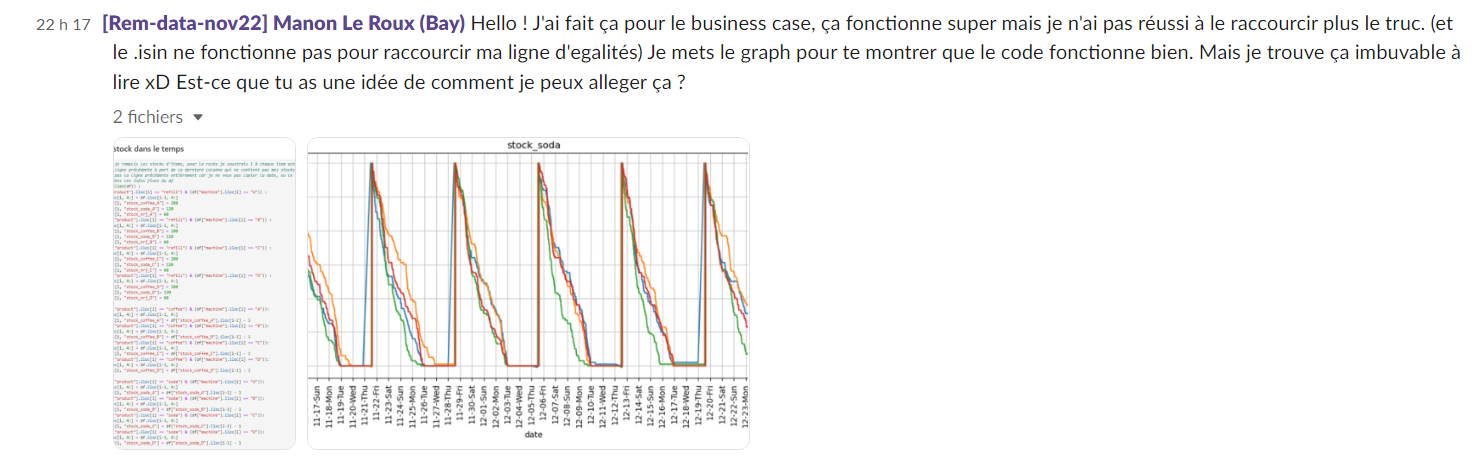

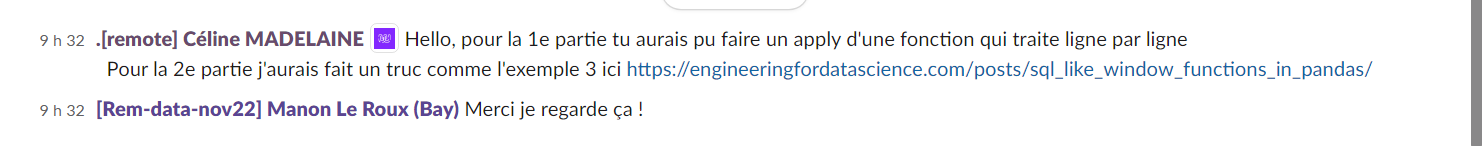

 https://engineeringfordatascience.com/posts/sql_like_window_functions_in_pandas/

## Récupérer jour semaine -> weekday

In [66]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          11042 non-null  object
 1   product       11042 non-null  object
 2   machine       11042 non-null  object
 3   coffee_A      11042 non-null  int64 
 4   coffee_A_sum  11042 non-null  int64 
 5   soda_A        11042 non-null  int64 
 6   soda_A_sum    11042 non-null  int64 
 7   nrj_A         11042 non-null  int64 
 8   nrj_A_sum     11042 non-null  int64 
 9   coffee_B      11042 non-null  int64 
 10  coffee_B_sum  11042 non-null  int64 
 11  soda_B        11042 non-null  int64 
 12  soda_B_sum    11042 non-null  int64 
 13  nrj_B         11042 non-null  int64 
 14  nrj_B_sum     11042 non-null  int64 
 15  coffee_C      11042 non-null  int64 
 16  coffee_C_sum  11042 non-null  int64 
 17  soda_C        11042 non-null  int64 
 18  soda_C_sum    11042 non-null  int64 
 19  nrj_

In [67]:
df_stock["date"] = pd.to_datetime(df_stock["date"]).dt.tz_localize(None)

In [68]:
df_stock["jour"] = df_stock["date"].apply(lambda x: x.strftime('%A'))

In [69]:
df_stock["heure"] = df_stock["date"].apply(lambda x: x.strftime('%H'))

In [70]:
df_stock

,date,product,machine,coffee_A,coffee_A_sum,soda_A,soda_A_sum,nrj_A,nrj_A_sum,coffee_B,coffee_B_sum,soda_B,soda_B_sum,nrj_B,nrj_B_sum,coffee_C,coffee_C_sum,soda_C,soda_C_sum,nrj_C,nrj_C_sum,coffee_D,coffee_D_sum,soda_D,soda_D_sum,nrj_D,nrj_D_sum,jour,heure
0,2019-11-14 11:53:35,refill,A,280,0,120,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,11
1,2019-11-14 12:06:35,coffee,A,279,0,120,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
2,2019-11-14 12:07:59,soda,A,279,0,119,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
3,2019-11-14 12:13:45,soda,A,279,0,118,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
4,2019-11-14 12:22:35,coffee,A,278,0,118,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,2019-12-25 20:10:53,nrj,A,0,280,0,120,3,57,0,280,0,120,3,57,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,20
11038,2019-12-25 20:16:30,nrj,B,0,280,0,120,3,57,0,280,0,120,2,58,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,20
11039,2019-12-25 20:26:35,nrj,B,0,280,0,120,3,57,0,280,0,120,1,59,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,20
11040,2019-12-25 21:11:55,nrj,B,0,280,0,120,3,57,0,280,0,120,0,60,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,21


## Graphiques pénuries 

In [71]:
df_coffee = df_stock.iloc[:, [0,3,4,9,10,15,16,21,22,27,28]]

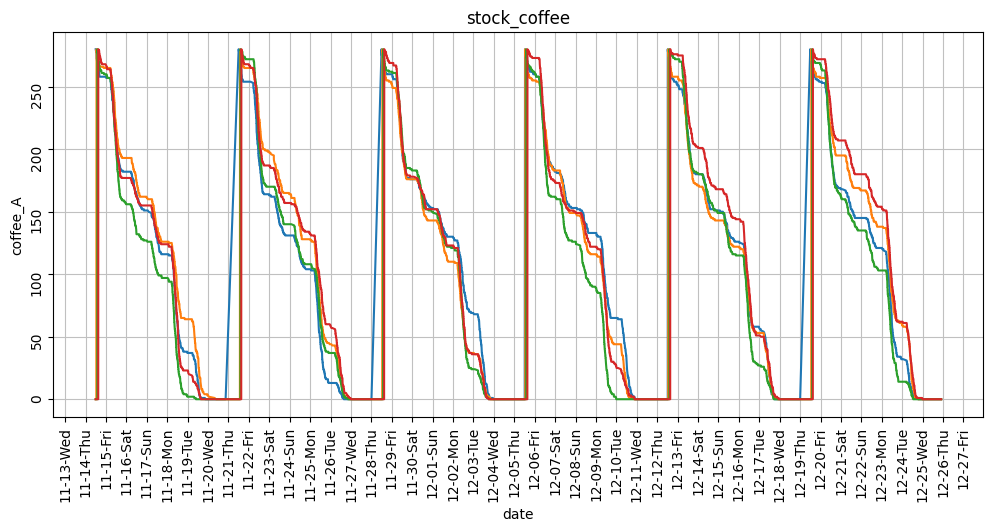

In [72]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("stock_coffee")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%a"))
ax.grid(True,color="silver")
sns.lineplot(data=df_coffee, x="date",y="coffee_A")
sns.lineplot(data=df_coffee, x="date",y="coffee_B")
sns.lineplot(data=df_coffee, x="date",y="coffee_C")
sns.lineplot(data=df_coffee, x="date",y="coffee_D")
plt.tick_params(labelrotation=90)
plt.show()

In [73]:
df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")]

,date,coffee_A,coffee_A_sum,coffee_B,coffee_B_sum,coffee_C,coffee_C_sum,coffee_D,coffee_D_sum,jour,heure
161,2019-11-15 00:06:21,258,0,265,0,260,0,267,0,Friday,00
162,2019-11-15 00:11:51,258,0,265,0,260,0,267,0,Friday,00
163,2019-11-15 00:14:34,257,0,265,0,260,0,267,0,Friday,00
164,2019-11-15 00:23:36,257,0,265,0,260,0,266,0,Friday,00
165,2019-11-15 00:31:03,257,0,265,0,260,0,266,0,Friday,00
...,...,...,...,...,...,...,...,...,...,...,...
732,2019-11-15 23:30:12,182,0,193,0,156,0,177,0,Friday,23
733,2019-11-15 23:43:01,182,0,193,0,156,0,177,0,Friday,23
734,2019-11-15 23:50:39,182,0,193,0,156,0,177,0,Friday,23
735,2019-11-15 23:52:37,182,0,193,0,156,0,177,0,Friday,23


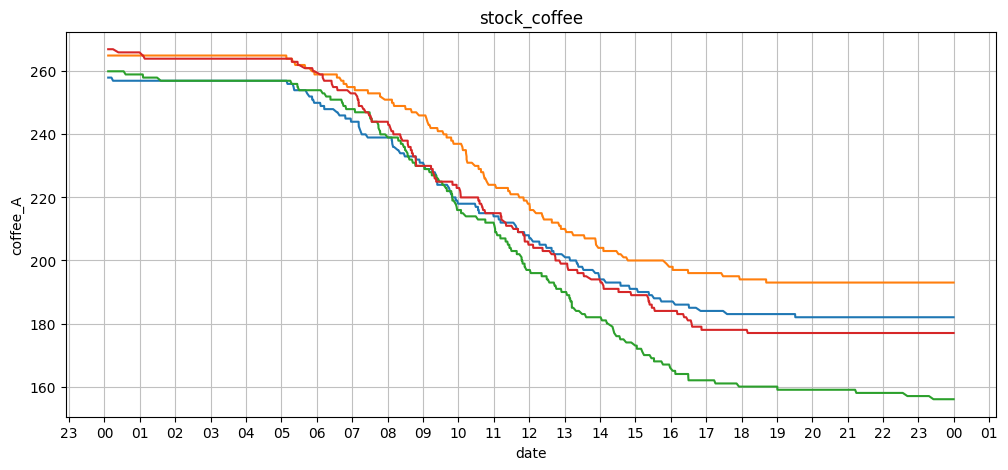

In [74]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("stock_coffee")
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(DateFormatter("%H"))
ax.grid(True,color="silver")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_A")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_B")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_C")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_D")
plt.show()

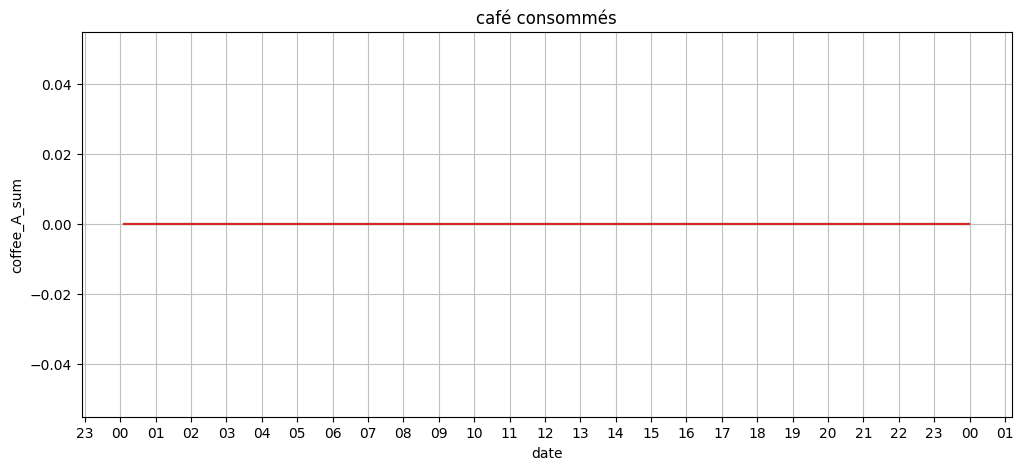

In [75]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("café consommés")
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(DateFormatter("%H"))
ax.grid(True,color="silver")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_A_sum")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_B_sum")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_C_sum")
sns.lineplot(data=df_coffee[(df_coffee["date"] > "2019-11-15") & (df_coffee["date"] < "2019-11-16")], x="date",y="coffee_D_sum")
plt.show()

In [76]:
# je recupère la liste de mes colonnes qui contiennent mes valeurs à traiter
liste_col_valeurs = df_stock.iloc[:,3:15].columns

In [77]:
liste_col_valeurs

Index(['coffee_A', 'coffee_A_sum', 'soda_A', 'soda_A_sum', 'nrj_A',
       'nrj_A_sum', 'coffee_B', 'coffee_B_sum', 'soda_B', 'soda_B_sum',
       'nrj_B', 'nrj_B_sum'],
      dtype='object')

In [78]:
df_stock.iloc[:,3:15].head(3) 

,coffee_A,coffee_A_sum,soda_A,soda_A_sum,nrj_A,nrj_A_sum,coffee_B,coffee_B_sum,soda_B,soda_B_sum,nrj_B,nrj_B_sum
0,280,0,120,0,60,0,0,0,0,0,0,0
1,279,0,120,0,60,0,0,0,0,0,0,0
2,279,0,119,0,60,0,0,0,0,0,0,0


In [79]:
# 6 valeurs négatives dans le df, remplacement par la valeur 0 (idéalement controle à ajouter lors de la génération du calcul) 
# hypothese : un des sodas est resté coincé dans la machine, 121 sodas sont achetés alors qu'il n'y a que 120 sodas

In [80]:
df_stock[df_stock["soda_B"]<0]

,date,product,machine,coffee_A,coffee_A_sum,soda_A,soda_A_sum,nrj_A,nrj_A_sum,coffee_B,coffee_B_sum,soda_B,soda_B_sum,nrj_B,nrj_B_sum,coffee_C,coffee_C_sum,soda_C,soda_C_sum,nrj_C,nrj_C_sum,coffee_D,coffee_D_sum,soda_D,soda_D_sum,nrj_D,nrj_D_sum,jour,heure
1849,2019-11-21 13:08:02,soda,B,275,0,117,0,60,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,13
1850,2019-11-21 13:23:35,coffee,A,274,0,117,0,60,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,13


In [ ]:
nan_values = df"stock"[df.isna().any(axis=1)]

In [81]:
for col in liste_col_valeurs : 
   df_stock = df_stock.mask(df_stock[col]<0,0)

In [82]:
df_stock[df_stock["soda_B"]<0]

,date,product,machine,coffee_A,coffee_A_sum,soda_A,soda_A_sum,nrj_A,nrj_A_sum,coffee_B,coffee_B_sum,soda_B,soda_B_sum,nrj_B,nrj_B_sum,coffee_C,coffee_C_sum,soda_C,soda_C_sum,nrj_C,nrj_C_sum,coffee_D,coffee_D_sum,soda_D,soda_D_sum,nrj_D,nrj_D_sum,jour,heure


In [83]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          11042 non-null  object
 1   product       11042 non-null  object
 2   machine       11042 non-null  object
 3   coffee_A      11042 non-null  int64 
 4   coffee_A_sum  11042 non-null  int64 
 5   soda_A        11042 non-null  int64 
 6   soda_A_sum    11042 non-null  int64 
 7   nrj_A         11042 non-null  int64 
 8   nrj_A_sum     11042 non-null  int64 
 9   coffee_B      11042 non-null  int64 
 10  coffee_B_sum  11042 non-null  int64 
 11  soda_B        11042 non-null  int64 
 12  soda_B_sum    11042 non-null  int64 
 13  nrj_B         11042 non-null  int64 
 14  nrj_B_sum     11042 non-null  int64 
 15  coffee_C      11042 non-null  int64 
 16  coffee_C_sum  11042 non-null  int64 
 17  soda_C        11042 non-null  int64 
 18  soda_C_sum    11042 non-null  int64 
 19  nrj_

In [84]:
df_stock

,date,product,machine,coffee_A,coffee_A_sum,soda_A,soda_A_sum,nrj_A,nrj_A_sum,coffee_B,coffee_B_sum,soda_B,soda_B_sum,nrj_B,nrj_B_sum,coffee_C,coffee_C_sum,soda_C,soda_C_sum,nrj_C,nrj_C_sum,coffee_D,coffee_D_sum,soda_D,soda_D_sum,nrj_D,nrj_D_sum,jour,heure
0,2019-11-14 11:53:35,refill,A,280,0,120,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,11
1,2019-11-14 12:06:35,coffee,A,279,0,120,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
2,2019-11-14 12:07:59,soda,A,279,0,119,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
3,2019-11-14 12:13:45,soda,A,279,0,118,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
4,2019-11-14 12:22:35,coffee,A,278,0,118,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thursday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,2019-12-25 20:10:53,nrj,A,0,280,0,120,3,57,0,280,0,120,3,57,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,20
11038,2019-12-25 20:16:30,nrj,B,0,280,0,120,3,57,0,280,0,120,2,58,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,20
11039,2019-12-25 20:26:35,nrj,B,0,280,0,120,3,57,0,280,0,120,1,59,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,20
11040,2019-12-25 21:11:55,nrj,B,0,280,0,120,3,57,0,280,0,120,0,60,0,280,0,120,0,60,0,280,0,120,0,60,Wednesday,21


In [ ]:
# suppr colonnes 0:2 faire un keep last row pour les heures 